In [1]:
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon, binom_test
from itertools import combinations
from IPython.display import display
from itertools import product
import seaborn as sns
%matplotlib inline

def compare_results(x, y):
    a = x.values
    b = y.values

    # wilcoxon test
    pwil = wilcoxon(a, b).pvalue
    
    # binomial test
    x_wins = np.mean(a > b)
    y_wins = np.mean(b > a)
    draw = np.mean(a == b)
    pbin = binom_test(np.sum(x_wins), n=x.shape[0], p=0.5, alternative='two-sided')
    diff = x - y
    
    # combine results
    results = pd.Series({'wilcoxon_pval': pwil,
                        'x_wins': x_wins, 
                        'y_wins': y_wins, 
                        'draw': draw,
                        'binomial_pval': pbin})
    results = pd.concat([results, diff.describe()], axis=0)
    # display results
    display(pd.DataFrame(results).T.drop(columns='count').round(3))
    
    # scatter plot
    fig, ax = plt.subplots(1)
    ax.scatter(a, b)
    ax.plot([0, np.max([np.max(x), np.max(y)])], 
            [0, np.max([np.max(x), np.max(y)])], 
            'red', linewidth=1)
    # ax.set_aspect('equal')
    ax.set(xlabel=x.name, ylabel=y.name);

HOME = os.path.expanduser("~")
PATH = os.path.join(HOME, "Documents/Research/toolboxes/sktime-benchmarking/results/")

In [5]:
rotf = pd.read_csv(os.path.join(PATH, "rotf/accuracy_rotf_updated.csv"), index_col=0, header=0)
rotf = rotf.rename(columns={"accuracy_mean": "markus"}).drop(columns="accuracy_stderr").set_index("dataset")

# rotf = pd.read_csv(os.path.join(PATH, "rotf/accuracy_nobootstrap.csv"), index_col=0, header=0)
# rotf = rotf.rename(columns={"mean": "markus"}).set_index("dataset")

In [6]:
# original = pd.read_csv(os.path.join(PATH, "AllSplits/RotF.csv"), header=None)
# original = original.iloc[:, :2].rename(columns={0: "dataset", 1: "java"}).set_index("dataset")

original = pd.read_csv(os.path.join(PATH, "rotf/TrainTestRotF.csv"), header=None)
original = original.iloc[:, :2].rename(columns={0: "dataset", 1: "java"}).set_index("dataset").loc[:, "java"]

In [7]:
merged = pd.concat([rotf, original], axis=1, sort=False).dropna(axis=0)

,wilcoxon_pval,x_wins,y_wins,draw,binomial_pval,mean,std,min,25%,50%,75%,max
0,0.002,0.364,0.545,0.091,0.0,-0.01,0.03,-0.171,-0.021,-0.003,0.007,0.075


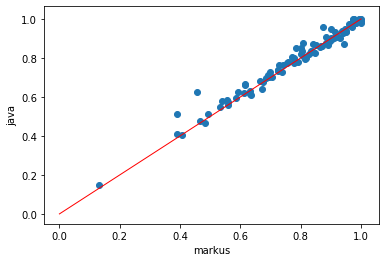

In [8]:
compare_results(merged.markus, merged.java)

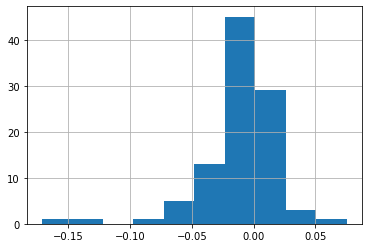

In [20]:
diff = merged.markus - merged.java
diff.hist();

In [10]:
diff.sort_values().head(10)

SemgHandMovementCh2   -0.171111
EOGHorizontalSignal   -0.124309
SemgHandGenderCh2     -0.083333
FaceFour              -0.068182
SemgHandSubjectCh2    -0.064444
BeetleFly             -0.050000
BirdChicken           -0.050000
Computers             -0.048000
InsectWingbeatSound   -0.045455
MiddlePhalanxTW       -0.038961
dtype: float64

In [11]:
worst = diff.sort_values().index[:10].values
worst

array(['SemgHandMovementCh2', 'EOGHorizontalSignal', 'SemgHandGenderCh2',
       'FaceFour', 'SemgHandSubjectCh2', 'BeetleFly', 'BirdChicken',
       'Computers', 'InsectWingbeatSound', 'MiddlePhalanxTW'],
      dtype=object)

In [19]:
# merged.loc[["MiddlePhalanxOutlineAgeGroup",
#                  "MiddlePhalanxOutlineCorrect",
#                  "PhalangesOutlinesCorrect"]]
merged['diff'] = merged.markus - merged.java
merged.sort_values('diff').head(10)

,strategy,markus,java,diff
SemgHandMovementCh2,rotf,0.455556,0.626667,-0.171111
EOGHorizontalSignal,rotf,0.389503,0.513812,-0.124309
SemgHandGenderCh2,rotf,0.873333,0.956667,-0.083333
FaceFour,rotf,0.806818,0.875000,-0.068182
SemgHandSubjectCh2,rotf,0.784444,0.848889,-0.064444
BeetleFly,rotf,0.900000,0.950000,-0.050000
BirdChicken,rotf,0.800000,0.850000,-0.050000
Computers,rotf,0.616000,0.664000,-0.048000
InsectWingbeatSound,rotf,0.614141,0.659596,-0.045455
MiddlePhalanxTW,rotf,0.538961,0.577922,-0.038961
